# Spectral filtering and resampling
This tutorial covers spectral filtering and resampling, and gives examples of how filtering can be used for artifact repair.

In [8]:
# This notebook is based on MNE-Python tutorials and examples, e.g.
# https://mne.tools/stable/auto_tutorials/preprocessing/30_filtering_resampling.html
# Modified by Olaf Hauk, olaf.hauk@mrc-cbu.cam.ac.uk
# These notebooks complement the online lectures "Introduction to EEG/MEG analysis":
# https://www.youtube.com/playlist?list=PLp67eqWCj2f_DBsCMkIOBpBbLWGAUKtu5

We begin as always by importing the necessary Python modules and defining some variables. 

In [13]:
import os

import matplotlib.pyplot as plt

import numpy as np

import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(
    sample_data_folder, "MEG", "sample", "sample_audvis_raw.fif"
)

We are ready to load the raw data.

In [14]:
raw_ori = mne.io.read_raw_fif(sample_data_raw_file)
raw = raw_ori.copy()  # keep the original data before filtering

Opening raw data file C:\Users\olaf\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


Let's check the information provided with our raw data file:

In [15]:
raw

<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~3.2 MiB, data not loaded>

First things first - let's visually inspect the raw data with minimal pre-processing.

In [21]:
# plot raw data in browser
raw.plot()

<mne_qt_browser._pg_figure.MNEQtBrowser(0x14e91c50e40) at 0x0000014DF34A2F00>

Waiting for Loading-Thread to finish... (max. 10 sec)
Channels marked as bad:
['MEG 2443', 'EEG 053']


C:\Users\olaf\AppData\Local\mne-python\1.8.0_0\mne1.9.0\Lib\site-packages\mne_qt_browser\_pg_figure.py:3061: RuntimeWarning: Failed to disconnect (None) from signal "triggered()".
  sig.disconnect()


**Exercise:** Browse the data. Do you see anything that looks interesting or suspicious?

## Background on filtering

A filter removes or attenuates parts of a signal. Spectral filters act on
specific *frequency ranges* of a signal — for example, suppressing all
frequency components above or below a certain cutoff value. 

Artifacts that are restricted to a narrow frequency range can sometimes
be repaired by filtering the data. Two examples of frequency-restricted
artifacts are slow drifts (low frequency) and power line noise (narrow frequency band). Here we illustrate how each
of these can be addressed by filtering.


### Slow drifts

Low-frequency drifts in raw data can usually be spotted by plotting a fairly
long span of data. Slow drifts can have many reasons - here it could have been a moving object in the vicinity of the sensors. 



In [17]:
# First things first - look at the data in the time domain
# settings chosen to highlight slow drift in magnetometers
raw.copy().pick(picks='mag').plot(duration=60, proj=False, remove_dc=False)

<mne_qt_browser._pg_figure.MNEQtBrowser(0x14df59d1b10) at 0x0000014DDCB15240>

Channels marked as bad:
none


C:\Users\olaf\AppData\Local\mne-python\1.8.0_0\mne1.9.0\Lib\site-packages\mne_qt_browser\_pg_figure.py:3061: RuntimeWarning: Failed to disconnect (None) from signal "triggered()".
  sig.disconnect()


**Exercise:** Test the "moving object" hypothesis by checking the time courses of all sensor types. What would you expect for an artefact from an external noise source?

Let's see if we can attenuate the artefact with an appropriate filter. What type of filter would you choose?

In [18]:
# We have to load the raw data before filtering:
raw.load_data()

Reading 0 ... 166799  =      0.000 ...   277.714 secs...


<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.7 MiB, data loaded>

In [8]:
# Dampen slow drifts - high-pass filter
raw.filter(l_freq=0.5, h_freq=None)
raw.copy().pick(picks='mag').plot(duration=60, proj=False, remove_dc=False)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3965 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.7s


<mne_qt_browser._pg_figure.MNEQtBrowser(0x14df1866170) at 0x0000014DDC153C40>

Channels marked as bad:
none


C:\Users\olaf\AppData\Local\mne-python\1.8.0_0\mne1.9.0\Lib\site-packages\mne_qt_browser\_pg_figure.py:3061: RuntimeWarning: Failed to disconnect (None) from signal "triggered()".
  sig.disconnect()


**Exercise:** Try different low cutoff values.

We can also attenuate high-frequency noise, i.e. "smooth" our data. In event-related studies, we are often not interested in frequencies above ~40 Hz (but this depends on your interests). Higher frequencies are also often contaminated by muscle artefacts.

In [19]:
# Attenuate high-frequency noise, "smoothing" - low-pass filter
# Remember that filtering operates "in place", i.e. the effect of the previous high-pass filter is still present.
raw.filter(l_freq=None, h_freq=40.)
# This time simply plot all the data with defaults:
raw.plot()

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 199 samples (0.331 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.8s


<mne_qt_browser._pg_figure.MNEQtBrowser(0x14defbce900) at 0x0000014DDCD39080>

Channels marked as bad:
['MEG 2443', 'EEG 053']


C:\Users\olaf\AppData\Local\mne-python\1.8.0_0\mne1.9.0\Lib\site-packages\mne_qt_browser\_pg_figure.py:3061: RuntimeWarning: Failed to disconnect (None) from signal "triggered()".
  sig.disconnect()


# Frequency Spectra #

What do filters do to our data in the frequency domain?
Look at the frequency spectrum before and after filtering.

Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


C:\Users\olaf\AppData\Local\mne-python\1.8.0_0\mne1.9.0\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


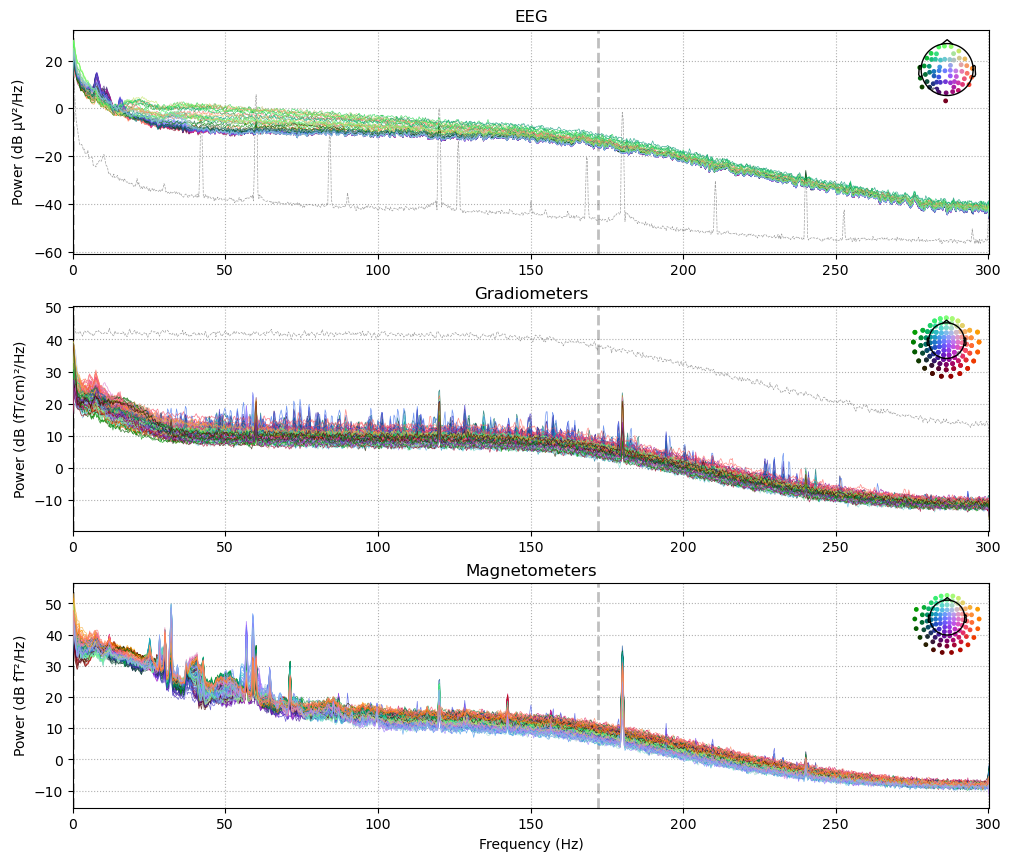

In [23]:
# before
raw_ori.compute_psd().plot();

Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


C:\Users\olaf\AppData\Local\mne-python\1.8.0_0\mne1.9.0\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


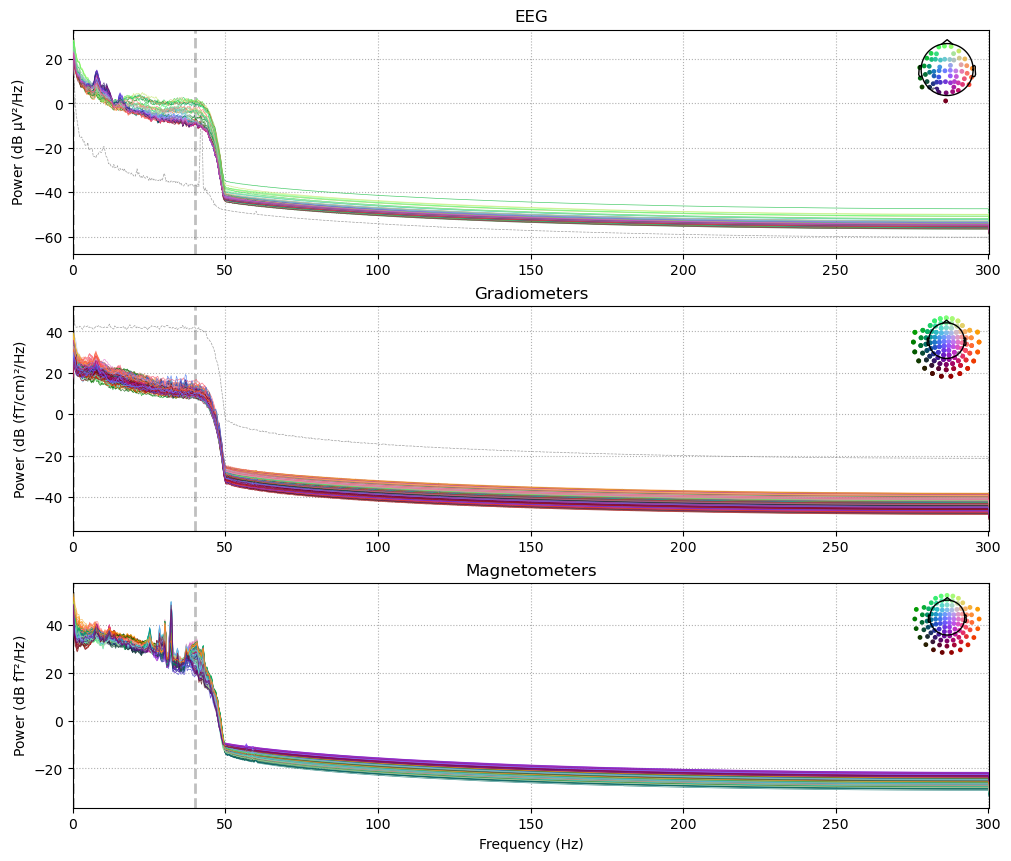

In [27]:
# after
raw.compute_psd().plot();
plt.show()

**Exercise:** Restrict the frequency range, i.e. the x-axis of the plot.
Hint: use the option 'fmax=\<cut-off>'.

# Line Noise #

Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\olaf\AppData\Local\mne-python\1.8.0_0\mne1.9.0\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


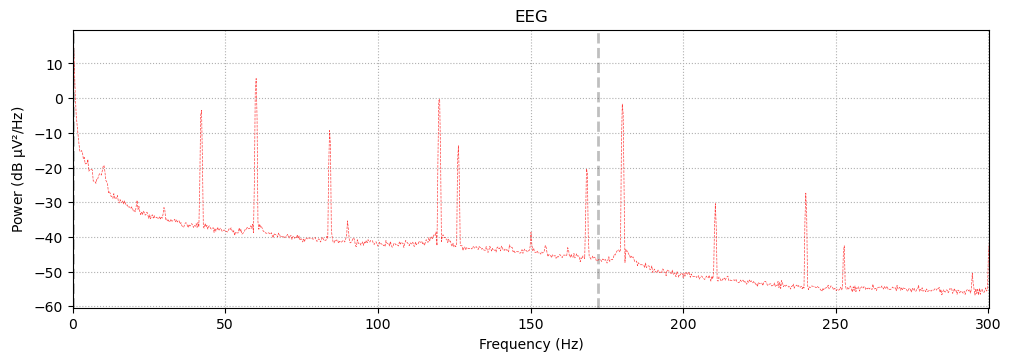

<mne_qt_browser._pg_figure.MNEQtBrowser(0x14e921c1680) at 0x0000014DF4F4CD80>

Channels marked as bad:
['EEG 053']


C:\Users\olaf\AppData\Local\mne-python\1.8.0_0\mne1.9.0\Lib\site-packages\mne_qt_browser\_pg_figure.py:3061: RuntimeWarning: Failed to disconnect (None) from signal "triggered()".
  sig.disconnect()


In [29]:
raw_ori.copy().pick(picks='EEG 053').compute_psd().plot();
plt.show()
raw_ori.copy().pick(picks='EEG 053').plot(duration=1.)

There seem to be more artefacts than just line noise, but the highest peaks are at 60|120|180Hz, i.e. harmonics of 60Hz. 

Note that these data were acquired in the US - **in Europe, line noise is at 50Hz** (and harmonics), see [here](https://en.wikipedia.org/wiki/Mains_electricity) for more details.

The very regular pattern in 'EEG 053' clearly doesn't look like physiological EEG, so it was a good decision to mark it as bad.

in order to get rid of line noise in all channels, we can apply a **Notch filter**:

In [30]:
# We may want to remove line noise (60Hz in US, 50Hz in Europe), e.g. if we are interested in frequencies above ~50Hz
raw = raw_ori.copy().load_data()  # use original data
raw.notch_filter(freqs=[60., 120., 180.])  # Notch filter, including harmonics

Reading 0 ... 166799  =      0.000 ...   277.714 secs...
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3965 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.7s


<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.7 MiB, data loaded>

Let's look at the effect of the Notch filter in the frequency spectrum.

Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


C:\Users\olaf\AppData\Local\mne-python\1.8.0_0\mne1.9.0\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


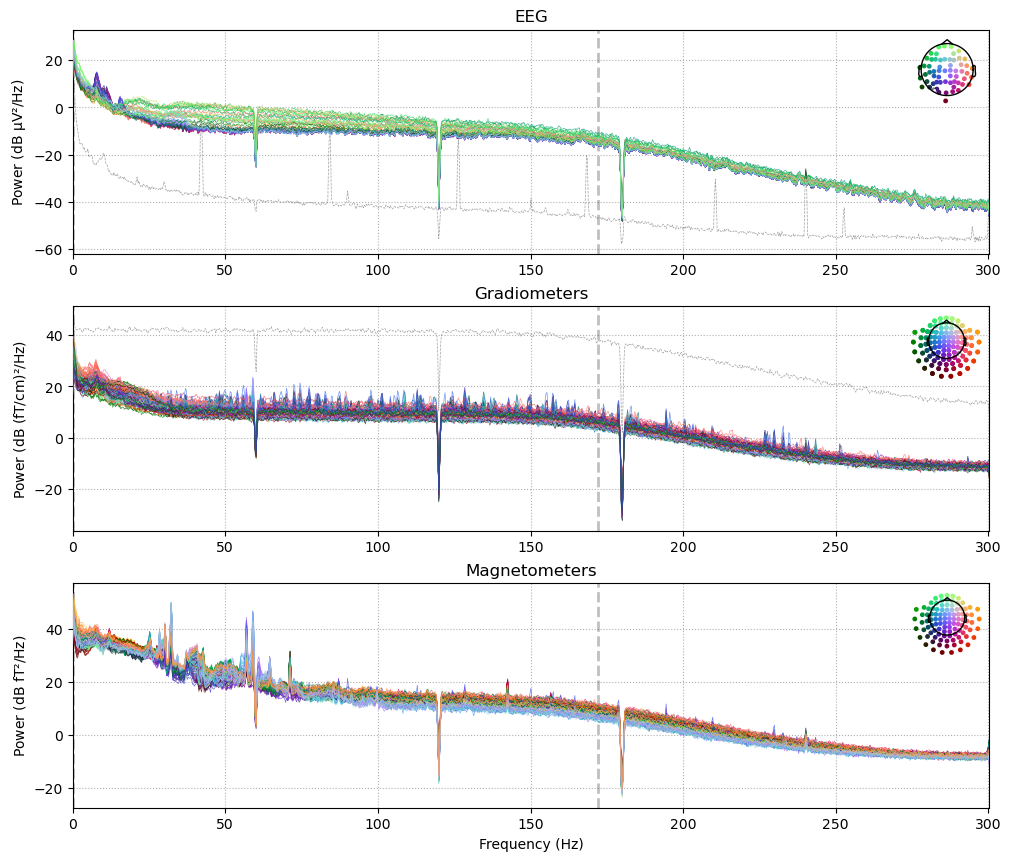

In [31]:
# plot full spectrum after Notch-filter
raw.compute_psd().plot()

## Filter characteristics
Above, we looked at the effect of filters on our raw data. <br>
However, we can look at filter characteristics independently of real data. This will tell us which frequencies are attenuated or not. <br>
We have to first compute the parameters for the filter, and then we can analyse it.

In [42]:
# get filter parameters for a high-pass filter
raw = raw_ori.copy()
filter_params = mne.filter.create_filter(
    raw.get_data(), raw.info["sfreq"], l_freq=0.1, h_freq=None
)

Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 19821 samples (33.001 s)



We can now plot the filter characteristics for these parameters:

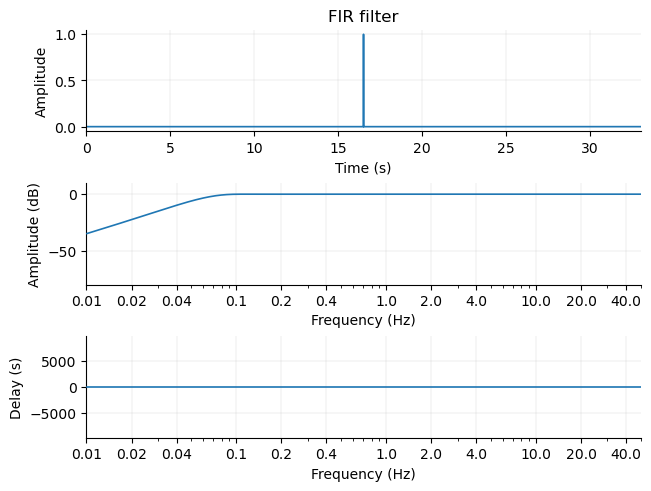

In [43]:
# plot filter characteristics for these parameters
# Use the following for pop-out figures, and use 'inline' to revert
# %matplotlib qt
mne.viz.plot_filter(filter_params, raw.info["sfreq"], flim=(0.01, 50));

__Exercise:__: Use different values for l_freq, e.g. above 10Hz, and see what happens to the filter characteristics.

Now let's do the same adding a (quite radical) low-pass filter.

Setting up band-pass filter from 0.1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 19821 samples (33.001 s)



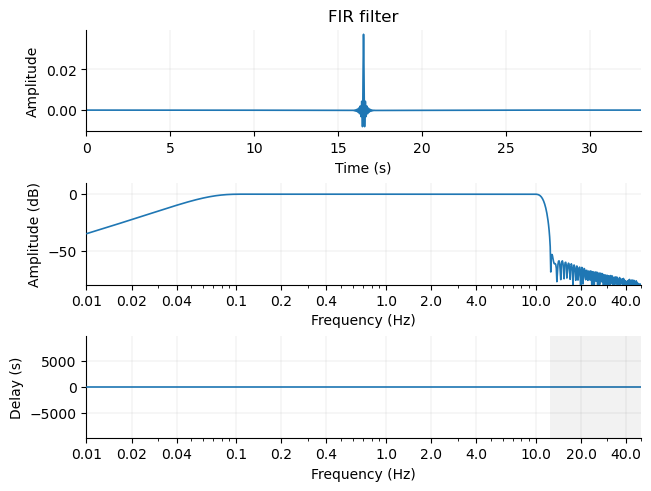

In [44]:
# get filter parameters for low-pass filter
raw = raw_ori.copy()
filter_params = mne.filter.create_filter(
    raw.get_data(), raw.info["sfreq"], l_freq=0.1, h_freq=10.
)
mne.viz.plot_filter(filter_params, raw.info["sfreq"], flim=(0.01, 50));

__Exercise:__ Play around with different cut-off frequencies. Remember you can get interactive pop-out plots with '%matplotlib qt'.

# Resampling

EEG and MEG recordings are notable for their high temporal precision, and are
sometimes recorded with sampling rates around 1000 Hz or higher. This is good
when precise timing of events is important to the experimental design or
analysis plan, but also consumes more memory and computational resources when
processing the data (which even has an impact on your carbon footprint). In cases where high-frequency components of the signal
are not of interest, downsampling the signal can be a useful
time-saver.

In MNE-Python, the resampling methods (:meth:`raw.resample()
<mne.io.Raw.resample>`, :meth:`epochs.resample() <mne.Epochs.resample>` and
:meth:`evoked.resample() <mne.Evoked.resample>`) apply a low-pass filter to
the signal to avoid `aliasing`_, so you don't need to explicitly filter it
yourself first. This built-in filtering that happens when using
:meth:`raw.resample() <mne.io.Raw.resample>`, :meth:`epochs.resample()
<mne.Epochs.resample>`, or :meth:`evoked.resample() <mne.Evoked.resample>` is
a brick-wall filter applied in the frequency domain at the `Nyquist
frequency`_ of the desired new sampling rate. This can be clearly seen in the
PSD plot, where a dashed vertical line indicates the filter cutoff; the
original data had an existing lowpass at around 172 Hz (see
``raw.info['lowpass']``), and the data resampled from ~600 Hz to 200 Hz gets
automatically lowpass filtered at 100 Hz (the `Nyquist frequency`_ for a
target rate of 200 Hz):



# Aliasing #

This is a toy example of aliasing if data are not appropriately filtered before down-sampling:

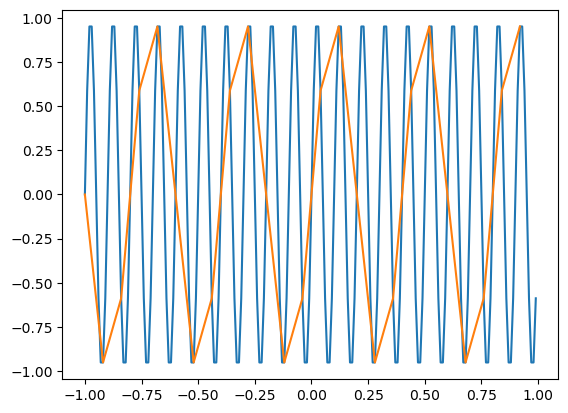

In [51]:
# 200 sample points from -1 to +1
x = np.arange(-1, 1, 0.01)

# sine curve with 10Hz
y = np.sin(2*np.pi*10*x)
fig = plt.plot(x, y)

# downsample, take every 8th sample
x2 = x[::8]
y2 = y[::8]
plt.plot(x2, y2)

plt.show()

Downsample the data (wait for it...):

In [45]:
# Resample data at lower frequency
raw = raw_ori.copy()

raw.resample(sfreq=100.)  # new sampling frequency 100Hz
# this can take a moment

320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
319 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]


C:\Users\olaf\AppData\Local\Temp\ipykernel_18128\406588387.py:4: RuntimeWarning: Resampling of the stim channels caused event information to become unreliable. Consider finding events on the original data and passing the event matrix as a parameter.
  raw.resample(sfreq=100.)  # new sampling frequency 100Hz


<Raw | sample_audvis_raw.fif, 376 x 27772 (277.7 s), ~82.9 MiB, data loaded>

Inspect the frequency spectrum of the downsampled data:

Effective window size : 20.480 (s)
Plotting power spectral density (dB=True).


C:\Users\olaf\AppData\Local\mne-python\1.8.0_0\mne1.9.0\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


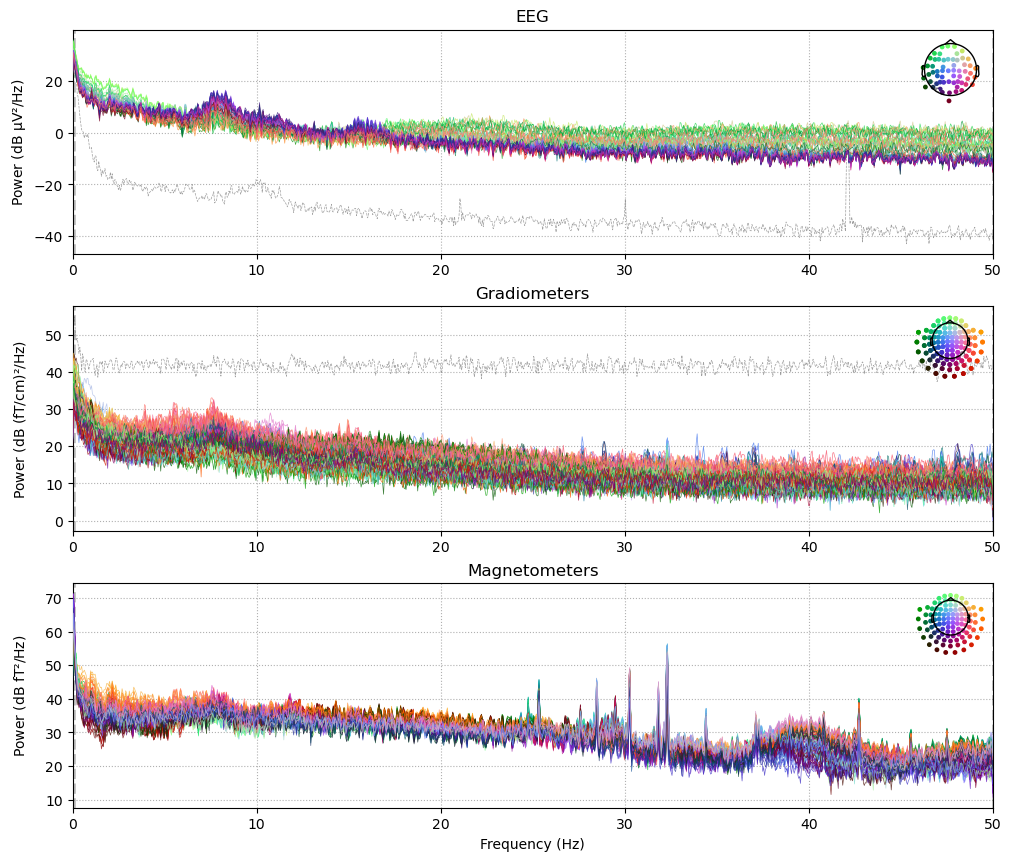

In [47]:
# What happens to the frequency spectrum?
raw.compute_psd().plot();
plt.show()

Note 1: Resampling can affect event __trigger timings__. If possible, resample after epoching your data,
or use "decimate", but see:

Note 2: "resample" applies __appropriate low-pass filtering__ to avoid aliasing effects. 
"decimate" doesn't - you have to filter your data beforehand yourself! As a rule of thumb, use a third of the desired sampling frequency as cut-off.
"decimate" is recommended if you want to reduce the amount of data and don't care about the exact sampling frequency.
It just picks a subset of existing sample points. MNE-Python allows you to decimate your data at the epoching step.

Note 3:
Accurate filtering requires appropriate amounts of data (i.e. number of samples), especially when low frequencies are concerned.
Thus, __filter the longest possible segments of data__, e.g. the raw data if possible.

To avoid this problem with our real data, we can use an appropriate resampling method:

In [52]:
# Resample data at lower frequency
raw = raw_ori.copy()

raw.resample(sfreq=100.)  # new sampling frequency 100Hz
# this can take a moment

320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
319 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]


C:\Users\olaf\AppData\Local\Temp\ipykernel_18128\406588387.py:4: RuntimeWarning: Resampling of the stim channels caused event information to become unreliable. Consider finding events on the original data and passing the event matrix as a parameter.
  raw.resample(sfreq=100.)  # new sampling frequency 100Hz


<Raw | sample_audvis_raw.fif, 376 x 27772 (277.7 s), ~82.9 MiB, data loaded>

What happens to the frequency spectrum?

Effective window size : 20.480 (s)
Plotting power spectral density (dB=True).


C:\Users\olaf\AppData\Local\mne-python\1.8.0_0\mne1.9.0\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


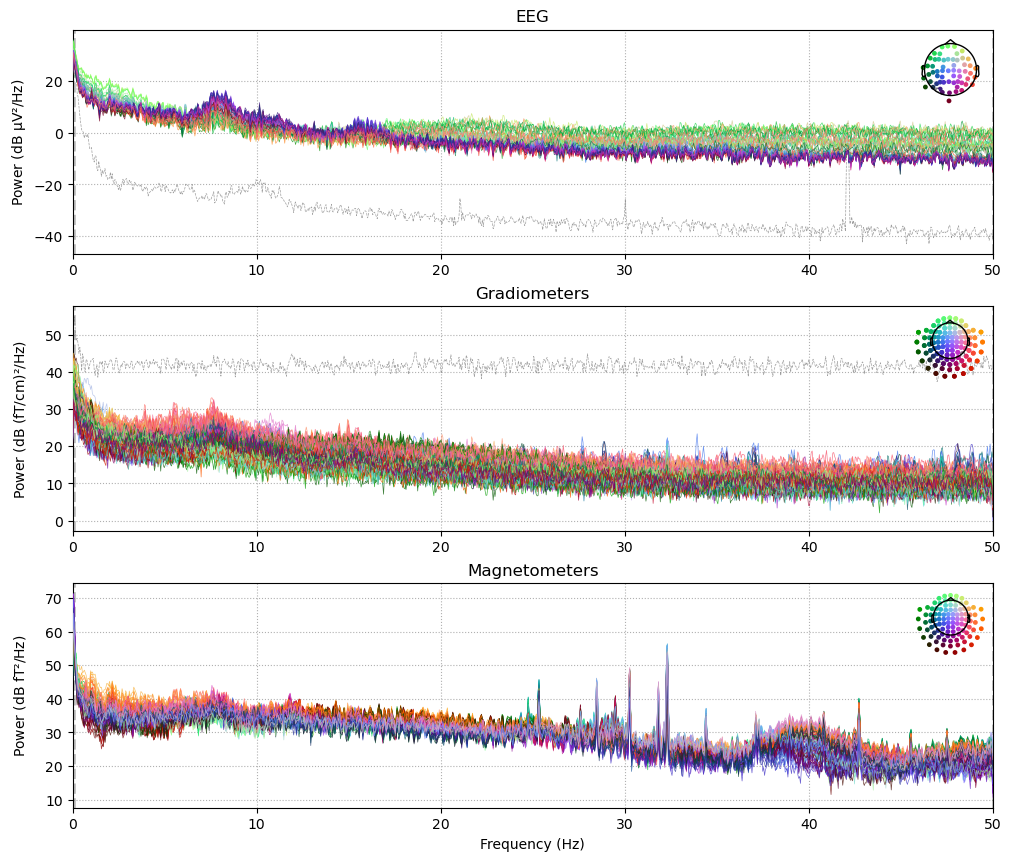

In [53]:
raw.compute_psd().plot();
plt.show()

### Best practices

From MNE-Python tutorial ():

Because resampling involves filtering, there are some pitfalls to resampling
at different points in the analysis stream:

- Performing resampling on :class:`~mne.io.Raw` data (*before* epoching) will
  negatively affect the temporal precision of Event arrays, by causing
  `jitter`_ in the event timing. This reduced temporal precision will
  propagate to subsequent epoching operations.

- Performing resampling *after* epoching can introduce edge artifacts *on
  every epoch*, whereas filtering the :class:`~mne.io.Raw` object will only
  introduce artifacts at the start and end of the recording (which is often
  far enough from the first and last epochs to have no affect on the
  analysis).

The following section suggests best practices to mitigate both of these
issues.

To avoid the reduction in temporal precision of events that comes with
resampling a :class:`~mne.io.Raw` object, and also avoid the edge artifacts
that come with filtering an :class:`~mne.Epochs` or :class:`~mne.Evoked`
object, the best practice is to:

1. low-pass filter the :class:`~mne.io.Raw` data at or below
   $\frac{1}{3}$ of the desired sample rate, then

2. decimate the data after epoching, by either passing the ``decim``
   parameter to the :class:`~mne.Epochs` constructor, or using the
   :meth:`~mne.Epochs.decimate` method after the :class:`~mne.Epochs` have
   been created.

<div class="alert alert-danger"><h4>Warning</h4><p>The recommendation for setting the low-pass corner frequency at
   $\frac{1}{3}$ of the desired sample rate is a fairly safe rule of
   thumb based on the default settings in :meth:`raw.filter()
   <mne.io.Raw.filter>` (which are different from the filter settings used
   inside the :meth:`raw.resample() <mne.io.Raw.resample>` method). If you
   use a customized lowpass filter (specifically, if your transition
   bandwidth is wider than 0.5× the lowpass cutoff), downsampling to 3× the
   lowpass cutoff may still not be enough to avoid `aliasing`_, and
   MNE-Python will not warn you about it (because the :class:`raw.info
   <mne.Info>` object only keeps track of the lowpass cutoff, not the
   transition bandwidth). Conversely, if you use a steeper filter, the
   warning may be too sensitive. If you are unsure, plot the PSD of your
   filtered data *before decimating* and ensure that there is no content in
   the frequencies above the `Nyquist frequency`_ of the sample rate you'll
   end up with *after* decimation.</p></div>

Note that this method of manually filtering and decimating is exact only when
the original sampling frequency is an integer multiple of the desired new
sampling frequency. Since the sampling frequency of our example data is
600.614990234375 Hz, ending up with a specific sampling frequency like (say)
90 Hz will not be possible:



Note:
Resampling applies an appropriate low-pass filter before resampling to avoid aliasing artefacts.
However, this can affect the timings of trigger values.
Thus, decimating (sub-sampling) is recommended if the goald is to reduce the amount of data, but the specific sampling rate does not matter.
In this case, low-pass filtering is NOT automatically applied. A low-pass filter with a cut-off frequency at 1/3 of the desired sampling frequency is recommended.

See also:
https://mne.tools/stable/auto_tutorials/preprocessing/30_filtering_resampling.html

If for some reason you cannot follow the above-recommended best practices,
you should at the very least either:

1. resample the data *after* epoching, and make your epochs long enough that
   edge effects from the filtering do not affect the temporal span of the
   epoch that you hope to analyze / interpret; or

2. perform resampling on the :class:`~mne.io.Raw` object and its
   corresponding Events array *simultaneously* so that they stay more or less
   in synch. This can be done by passing the Events array as the
   ``events`` parameter to :meth:`raw.resample() <mne.io.Raw.resample>`.


.. LINKS

   https://en.wikipedia.org/wiki/Mains_electricity

